In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf


In [2]:
data=pd.read_csv(r'C:\\Users\hp\Documents\archive\heart.csv')

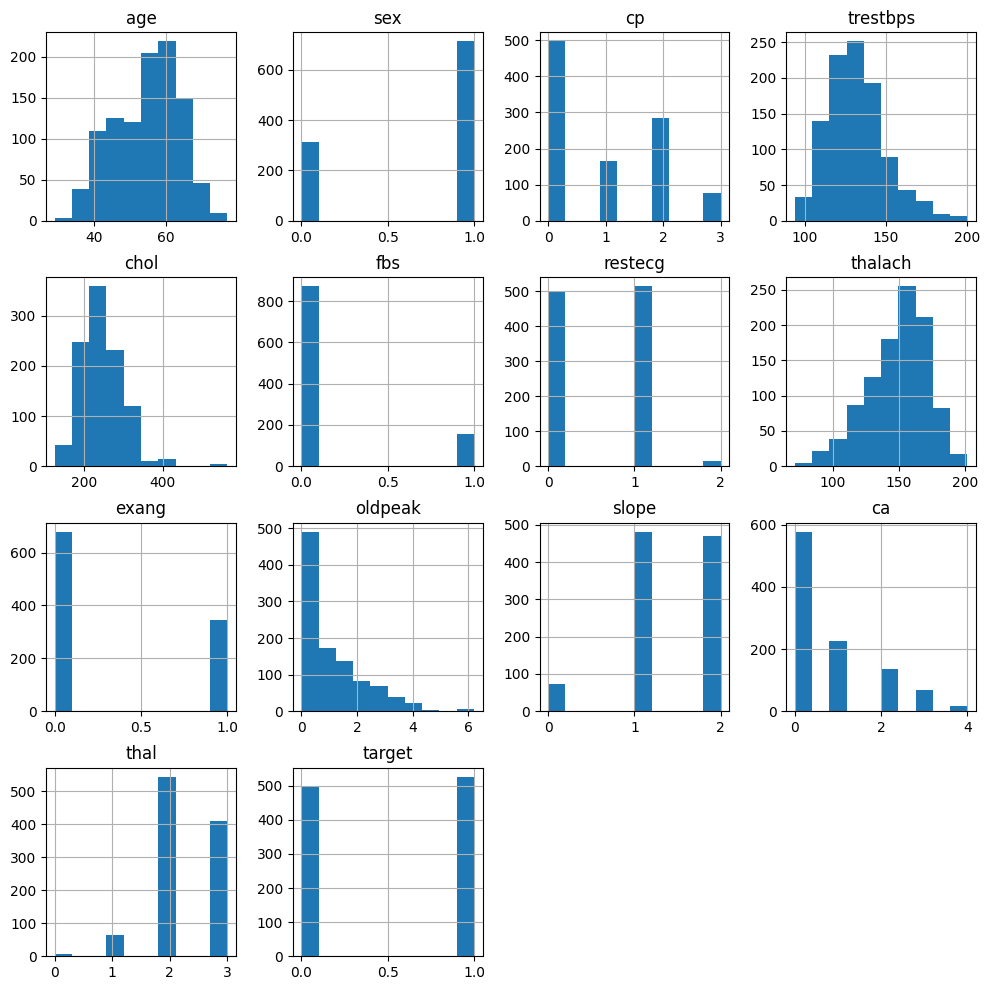

In [3]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

In [4]:
# print the shape of the DataFrame, so we can see how many examples we have
print( 'Shape of DataFrame: {}'.format(data.shape))
print (data.loc[1])

Shape of DataFrame: (1025, 14)
age          53.0
sex           1.0
cp            0.0
trestbps    140.0
chol        203.0
fbs           1.0
restecg       0.0
thalach     155.0
exang         1.0
oldpeak       3.1
slope         0.0
ca            0.0
thal          3.0
target        0.0
Name: 1, dtype: float64


In [5]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
# transform data to numeric to enable further analysis because some values were in floating point
data = data.apply(pd.to_numeric)

In [6]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Creating training and testing datasets

In [7]:
X = np.array(data.drop('target',axis=1))
y = np.array(data['target'])

In [8]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [9]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [10]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()
print(Y_test_binary)

[0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1
 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1
 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1
 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0
 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1]


In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
# fit the binary model on the training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Epoch 1/50
82/82 [==============================] - 1s 5ms/step - loss: 0.6469 - accuracy: 0.7549 - val_loss: 0.5767 - val_accuracy: 0.8585
Epoch 2/50
82/82 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.8317 - val_loss: 0.4407 - val_accuracy: 0.8244
Epoch 3/50
82/82 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.8439 - val_loss: 0.3769 - val_accuracy: 0.8244
Epoch 4/50
82/82 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8476 - val_loss: 0.3530 - val_accuracy: 0.8293
Epoch 5/50
82/82 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.8573 - val_loss: 0.3385 - val_accuracy: 0.8390
Epoch 6/50
82/82 [==============================] - 0s 3ms/step - loss: 0.3701 - accuracy: 0.8671 - val_loss: 0.3322 - val_accuracy: 0.8537
Epoch 7/50
82/82 [==============================] - 0s 2ms/step - loss: 0.3527 - accuracy: 0.8780 - val_loss: 0.3248 - val_accuracy: 0.8585
Epoch 8/50
82/82 [==

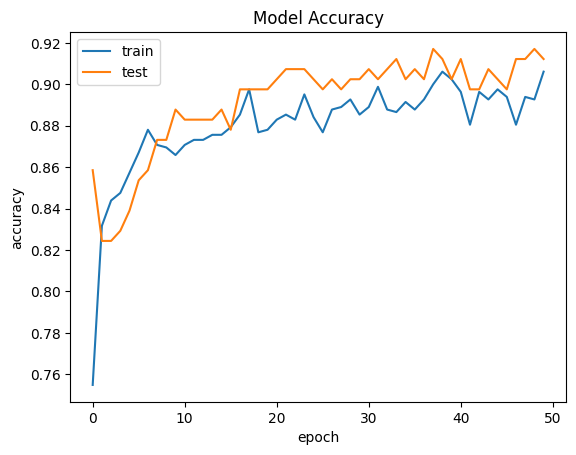

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

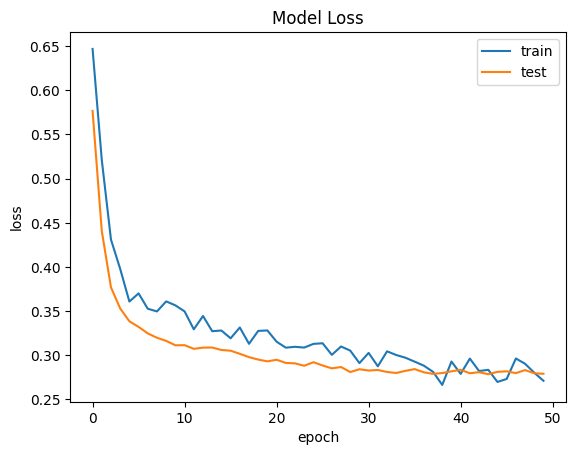

In [15]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [16]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

7/7 [==============================] - 0s 2ms/step
Results for Binary Model
0.9121951219512195
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       100
           1       0.91      0.91      0.91       105

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205

